In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None

In [188]:
def clean_data(raw_df):
    mask = (raw_df[0].str.count(':') == 1) & (raw_df[0].str.count('#') == 1)  
    data = raw_df[mask]
    data[0] = data[0].str.replace('#','.')
    data['Type'] = data.loc[:, 0].str.split(':').str[0]
    data['Value'] = data.loc[:, 0].str.split(':').str[1]
    data['Value'] = pd.to_numeric(data['Value'])
    data['Time'] = data.index
    data.drop(0,axis=1,inplace=True)

    return data

['x1' 'y1' 'x2' 'y2' 'score' 'Supervisor Ball Distance'
 'Supervisor Ball Angle' 'distance estimate' 'angle' 'ball width'
 'ball height']


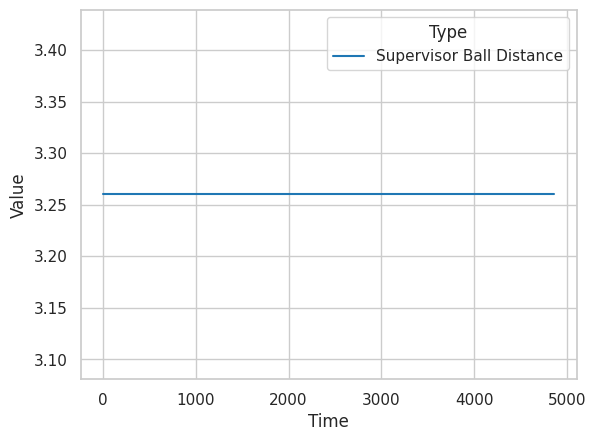

['Supervisor Ball Angle' 'Supervisor Ball Distance' 'distance estimate'
 'angle' 'ball width' 'ball height' 'x1' 'y1' 'x2' 'y2' 'score' ' x2']


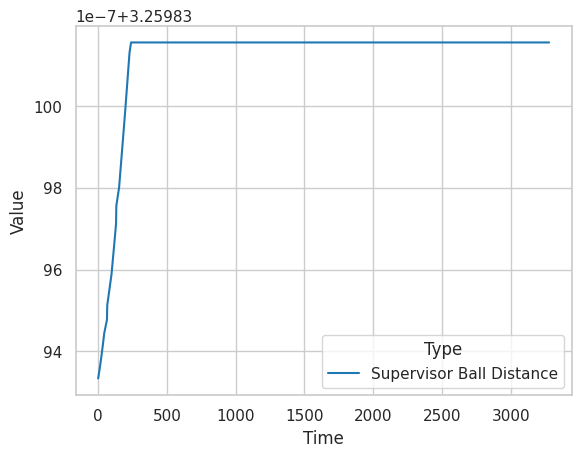

['Supervisor Ball Distance' 'Supervisor Ball Angle' 'distance estimate'
 'angle' 'ball width' 'ball height' 'x1' 'y1' 'x2' 'y2' 'score']


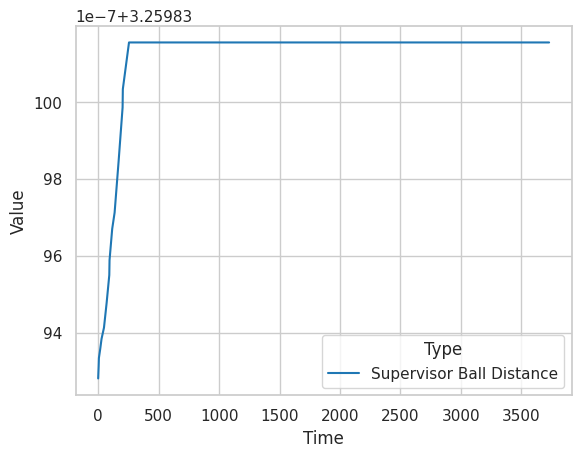

['upervisor Ball Distance' 'Supervisor Ball Angle'
 'Supervisor Ball Distance' 'distance estimate' 'angle' 'ball width'
 'ball height' 'x1' 'y1' 'x2' 'y2' 'score' ' x2']


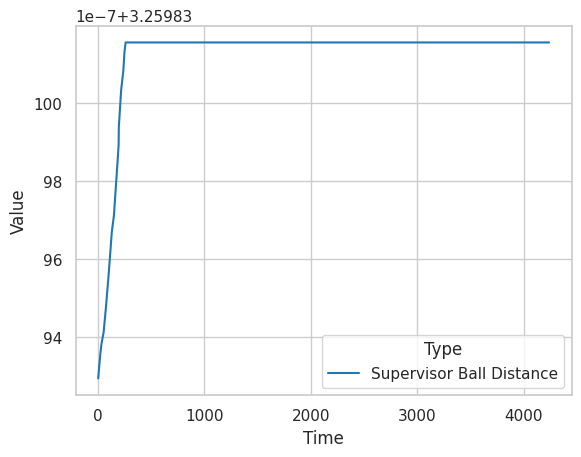

['score' 'Supervisor Ball Distance' 'Supervisor Ball Angle'
 'distance estimate' 'angle' 'ball width' 'ball height' 'x1' 'y1' 'x2'
 'y2' ' ball width' ' x1']


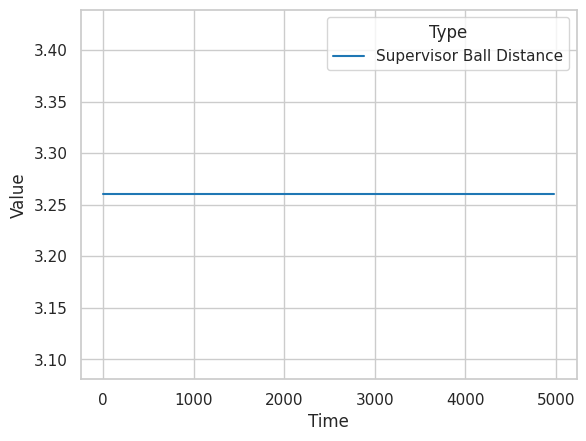

In [191]:
for test in ['test1.txt', 'test2.txt', 'test3.txt', 'test4.txt','test5.txt']:
    test = pd.read_csv(test,header=None)
    test = clean_data(test)
    print(test['Type'].unique())
    sns.set(style="whitegrid")
    filtered_data = test[test['Type'].str.contains('Supervisor Ball Dis')]
    sns.lineplot(x='Time', y='Value', hue='Type', data=filtered_data, palette='tab10')
    plt.show()

<Axes: xlabel='Time', ylabel='Value'>

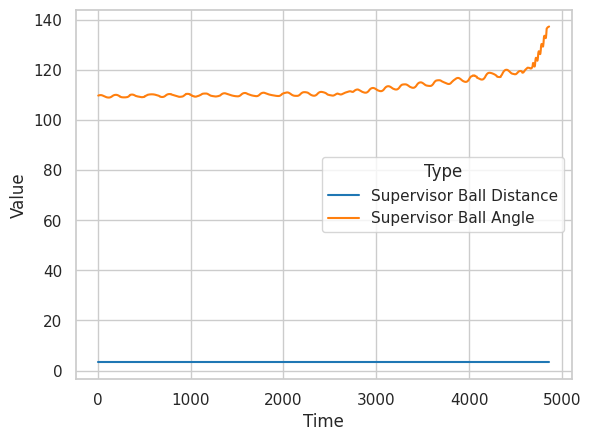

In [130]:
sns.set(style="whitegrid")
filtered_data = test1[test1['Type'].str.contains('Supervisor Ball')]
sns.lineplot(x='Time', y='Value', hue='Type', data=filtered_data, palette='tab10')


In [ ]:
raw_data = pd.read_csv('ball_distance.txt',header=None)
  
data = raw_data[raw_data[0].str.count(':') == 1]
data['type'] = data.loc[:, 0].str.split(':').str[0]
data['value'] = data.loc[:, 0].str.split(':').str[1]
data['time'] = data.index
data.drop(0,axis=1,inplace=True)

data['value'] = pd.to_numeric(data['value'])


print(data['type'].unique())

data.head()

['Supervisor Distance' 'distance estimate' 'angle']


,type,value,time
0,Supervisor Distance,3.259839,0
1,Supervisor Distance,3.351529,1
2,Supervisor Distance,3.259839,2
3,Supervisor Distance,3.351558,3
4,Supervisor Distance,3.259839,4


['Supervisor Distance', 'distance estimate']
Categories (3, object): ['Supervisor Distance', 'angle', 'distance estimate']


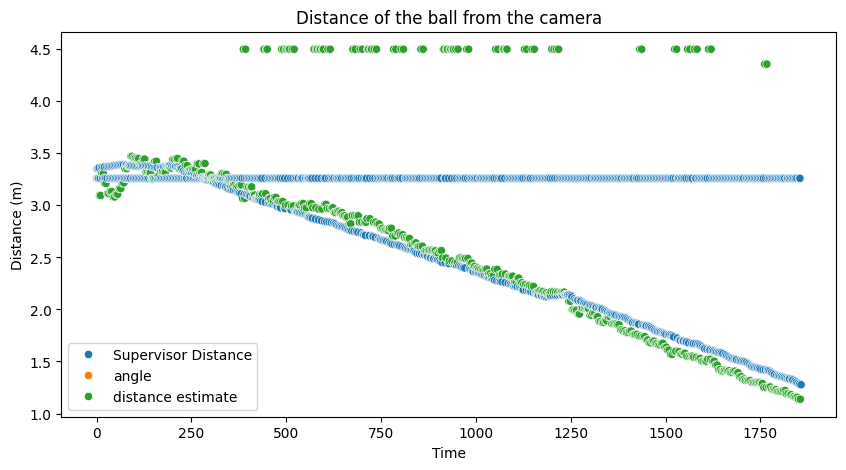

In [ ]:
distance_data = data[data['type'] != 'angle']
print(distance_data['type'].unique())

plt.figure(figsize=(10,5))
sns.scatterplot(data=distance_data,x='time',y='value',hue='type')
plt.title('Distance of the ball from the camera')
plt.xlabel('Time')
plt.ylabel('Distance (m)')
plt.legend()

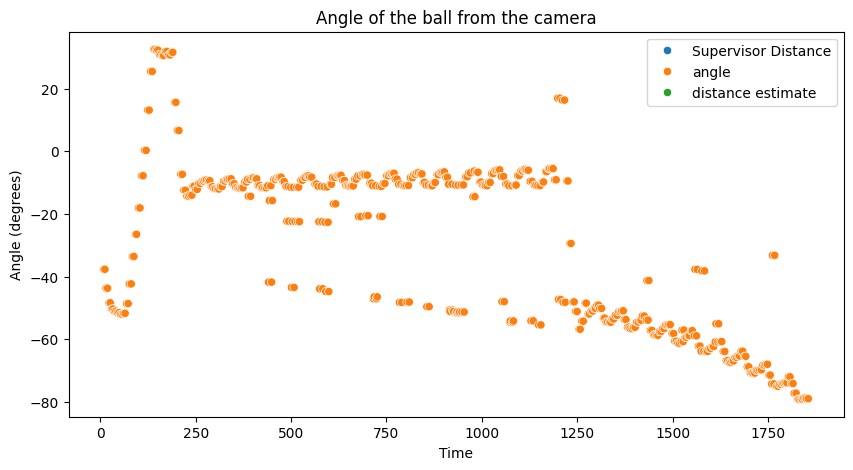

In [ ]:
angle_data = data[data['type'] == 'angle']

plt.figure(figsize=(10,5))
sns.scatterplot(data=angle_data,x='time',y='value',hue='type')
plt.title('Angle of the ball from the camera')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.legend()